Reference: [The Ultimate Pandas Bootcamp Advanced Python Data Analysis](https://eylearning.udemy.com/course/the-ultimate-pandas-bootcamp-advanced-python-data-analysis/learn/lecture/19905576)

Notes: 

- Numpy - numerical python
- N-dimensional array - basic data structure in numpy

## Libraries

In [3]:
import pandas as pd
import numpy as np

pd.__version__

'1.5.0'

## Numpy

In [10]:
alist = [1,2,3,4]
n_array_alist = np.array(alist)

# Very fast operations wtih numpy arrays - if you want to multiply by 10 for example
# Similarly there are many other such universal functions or ufuncs

n_array_alist * 10

# Python lists store the locations of the data and numpy arrays store the data in contiguous blocks in memory.
# Trade off: You can only store one data type in numpy arrays.
# Numpy does implicit upcasting if it for example recognises that the datatype is float for any of the data
# Lists on the other hand can store different datatypes in the same list. The lists themselves only store the pointers to the data in memory and not the actual data.

n_array_alist.dtype


dtype('int32')

## Series

### Basics

In [32]:
# A Series is a sequence of values with associated labels

students = ['A', 'B', 'C']
ages = [10,20,30]
heights = [140.5, 160.6, 170.5]

students_ls = pd.Series(students)  # Pandas automatically infers the datatype of the Series

mixed = ['A', 10, 15.5] 
pd.Series(mixed)    # Pandas Series can hold multiple datatypes, unlike numpy arrays

students_dict = {0:'A', 1:'B', 2:'C'}
students_ds = pd.Series(students_dict)

students_ls.equals(students_ds) # These two are equal. Python lists are ordered datatypes and that is preseved in the Series

# You can also create single item series 
pd.Series(31) # Pandas automatically creates the 0 based index here

# You can also specify the datatype, although pandas does automatically infer it
pd.Series(ages, dtype = 'float')
# Pandas automatically infers the dtype of strings as 'object' or dtype 'o'
# Strings are variable length, unlike for example int which is a fixed length
# So numpy stores a pointer to the location of the strings i.e. obj references 

# You can create your own index for a pandas Series, with the index parameter, or even if you don't specify index, pandas will recognise it as a positional argument
pd.Series(students, index = [2,3,4])

# There is also a string dtype in pandas 1.0.1 and above

students_ls.index # RangeIndex(start=0, stop=3. step=1)
# You can also create your own RangeIndex 

list(pd.RangeIndex(start=4, stop=11, step=1)) # RangeIndex is immuatable

# An attribute is a variable bound to the object, a method is a function bound to the object. 
# .equals() is a method 
# .dtype is an attribute 

students_ls.name # This is NULL unless you set it

students_ls.name = 'Student Names'
students_ls
# This name attribute later becomes the column names in a dataframe

# You can also name the index 
students_ls.index.name = 'Index'
students_ls

Index
0    A
1    B
2    C
Name: Student Names, dtype: object

### Indexing

#### head() tail()

In [44]:
int_series = pd.Series(range(0,60))
int_series

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
15    15
16    16
17    17
18    18
19    19
20    20
21    21
22    22
23    23
24    24
25    25
26    26
27    27
28    28
29    29
30    30
31    31
32    32
33    33
34    34
35    35
36    36
37    37
38    38
39    39
40    40
41    41
42    42
43    43
44    44
45    45
46    46
47    47
48    48
49    49
50    50
51    51
52    52
53    53
54    54
55    55
56    56
57    57
58    58
59    59
dtype: int64

In [56]:
int_series.size # size attribute to return the length of the Series 
int_series.head(n=10)
int_series.head()  # Default n=5
int_series.head(10)
int_series.tail(n=10)

50    50
51    51
52    52
53    53
54    54
55    55
56    56
57    57
58    58
59    59
dtype: int64

#### Extracting by Index Position & Labels

In [68]:
from string import ascii_lowercase, ascii_uppercase

alphabet = pd.Series(list(ascii_lowercase))
alphabet

0     a
1     b
2     c
3     d
4     e
5     f
6     g
7     h
8     i
9     j
10    k
11    l
12    m
13    n
14    o
15    p
16    q
17    r
18    s
19    t
20    u
21    v
22    w
23    x
24    y
25    z
dtype: object

In [67]:
# How do you access the elements in the Series?

alphabet[0]     # First letter 
alphabet[10]    # 11th letter 
alphabet[:3]    # First 3 letters
alphabet[5:10]  # Sixth through the 10th letter
alphabet[-6:]   # Last 6 letters
alphabet[:-6]   # Letters until the last 6


0     a
1     b
2     c
3     d
4     e
5     f
6     g
7     h
8     i
9     j
10    k
11    l
12    m
13    n
14    o
15    p
16    q
17    r
18    s
19    t
dtype: object

In [79]:
# Uppercase letters as the index, lowercase as the elements in the Series 

labelled_alphabet = pd.Series(data=list(ascii_lowercase), index=map(lambda x: 'label_' + x, list(ascii_uppercase)))
labelled_alphabet

labelled_alphabet = pd.Series(data=list(ascii_lowercase), index = ['label_' + x for x in list(ascii_uppercase)])
labelled_alphabet

labelled_alphabet['label_A'] # You can also extract using the index label
labelled_alphabet[:'label_C'] # In label based indexing, the last label is also included, unlike positional indexing

label_A    a
label_B    b
label_C    c
dtype: object

In [90]:
alphabet.add_prefix('label_') # Adds a prefix to the label index 
alphabet.add_suffix('_label') # Similarly adds a suffix to the label index 
# These methods return a new series, the original Series is not modified by calling the method 
# You need to reassign to modify the original Series 

alphabet = alphabet.add_prefix('label_') # This modifies the original Series

label_0     a
label_1     b
label_2     c
label_3     d
label_4     e
label_5     f
label_6     g
label_7     h
label_8     i
label_9     j
label_10    k
label_11    l
label_12    m
label_13    n
label_14    o
label_15    p
label_16    q
label_17    r
label_18    s
label_19    t
label_20    u
label_21    v
label_22    w
label_23    x
label_24    y
label_25    z
dtype: object

In [91]:
# We're using the dot notation to call methods on Series 
# You can also use the dot notation to access elements in a Series with the label index

alphabet.label_1

'b'

#### loc and iloc

* loc - label based indexing 
* iloc - position based indexing

In [98]:
labelled_alphabet['label_F': 'label_J']
labelled_alphabet.loc['label_F': 'label_J']
# These two return the same thing, so what is the difference? .loc is faster and the more typical way to do it
# Both of these support boolean masks 

students_ls # Bringing back the student series
students_ls[[True, False, True]] # This is a boolean mask applied on the Series i.e. a list of boolean values that we pass to the Series
students_ls.loc[[True, True, True]]
# Boolean masks need to be the same size as the Series, else this will throw an error

Index
0    A
1    B
2    C
Name: Student Names, dtype: object

In [100]:
# Use list comprehension to apply a Boolean mask to the alphabet series 
labelled_alphabet.loc[[True for i in range(26)]]

label_A    a
label_B    b
label_C    c
label_D    d
label_E    e
label_F    f
label_G    g
label_H    h
label_I    i
label_J    j
label_K    k
label_L    l
label_M    m
label_N    n
label_O    o
label_P    p
label_Q    q
label_R    r
label_S    s
label_T    t
label_U    u
label_V    v
label_W    w
label_X    x
label_Y    y
label_Z    z
dtype: object

In [103]:
labelled_alphabet.iloc[0]
labelled_alphabet.iloc[1:3]
labelled_alphabet.iloc[[1,3,5]] # You can also pass in a list of indices to iloc
# iloc is especially powerful to slice through 2D data
# Using iloc is akin to using just [] in a Series with numeric indices 

label_B    b
label_D    d
label_F    f
dtype: object

#### Indexing with Callables

In [107]:
# Used for highly customizable indexing - works with [], .loc and .iloc 

labelled_alphabet.loc[lambda x: [True for i in range(x.size)]] # Whenever we use callables, the x in the lambda function is the series itself
# So we're using a function to index the series 

def every_fifth(x): 
    return [True if (i+1)%5==0 else False for i in range(x.size)]

labelled_alphabet.iloc[every_fifth] # You can use any type of function here


label_E    e
label_J    j
label_O    o
label_T    t
label_Y    y
dtype: object

#### Indexing with get()

In [111]:
labelled_alphabet.get('label_I') # Similar to loc and [] indexing
# Why should we use get()? 

# get() returns None if you try to pass a label that is not found 
labelled_alphabet.get('label_nonexistent')
labelled_alphabet.get('label_nonexistent', default = None) # This is because there is a default of None 
labelled_alphabet.get('label_nonexistent', default = 'Could not find this label') # You can also create your own default value

# If you try to pass a label that does not exist to loc iloc or [], you will get an error 

labelled_alphabet.get(0) # get() also lets you index by integers just like []

'a'

### Methods

#### Size, Type, Unique

In [29]:
alcohol = pd.read_csv('drinks.csv', usecols = ['country', 'wine_servings'], index_col = 'country')  # This is read in as a dataframe

In [5]:
alcohol.head()

,wine_servings
country,
Afghanistan,NaN
Albania,54.0
Algeria,14.0
Andorra,312.0
Angola,45.0


In [6]:
type(alcohol)

pandas.core.frame.DataFrame

In [4]:
# If you wa bnt to read in the csv into a Series instead of a Dataframe, you can use the squeeze parameter in pd.read_csv 

alcohol = pd.read_csv('drinks.csv', usecols = ['country', 'wine_servings'], index_col = 'country', squeeze = True)
alcohol
# The below is a Series. The column wine_servings is the name of the series and the country is the index. Notice also that the dtype is automatically float64 as recognised by pandas

C:\Users\TA972PB\AppData\Local\Temp\ipykernel_66468\1117481432.py:3: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  alcohol = pd.read_csv('drinks.csv', usecols = ['country', 'wine_servings'], index_col = 'country', squeeze = True)


country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen            NaN
Zambia           4.0
Zimbabwe         4.0
Name: wine_servings, Length: 193, dtype: float64

In [8]:
# The above is derpeciated, so use the squeeze() method instead
alcohol = pd.read_csv('drinks.csv', usecols = ['country', 'wine_servings'], index_col = 'country').squeeze() 
alcohol

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen            NaN
Zambia           4.0
Zimbabwe         4.0
Name: wine_servings, Length: 193, dtype: float64

In [9]:
alcohol.size

193

In [10]:
alcohol.values

array([ nan,  54.,  14., 312.,  45.,  45., 221.,  11., 212., 191.,   5.,
        51.,   7.,  nan,  36.,  42., 212.,   8.,  13.,  nan,   8.,   8.,
        35.,  16.,   1.,  94.,   7.,  nan,   7.,  16.,   1.,   4.,   1.,
         1.,   1., 172.,   8.,   3.,   1.,   9.,  74.,  11., 254.,   5.,
       113., 134.,  nan,   1., 278.,   3.,  26.,   9.,   3.,   1.,   2.,
       233.,  nan,  59.,  nan,   1.,  97.,  37.,  59.,   1., 149., 175.,
         1., 218.,  28.,   2.,   2.,  21.,   1.,   1.,   2., 185.,  78.,
        nan,  nan,  nan,  nan, 165.,   9., 237.,   9.,  16.,   1.,  12.,
         2.,   1.,  nan,   6., 123.,  62.,  31.,  nan,   2.,  nan,  56.,
       271.,   4.,   1.,  nan,  nan,   1.,  12.,  nan,  nan,  18.,   5.,
        18.,  nan,   8., 128.,   1.,   5.,  nan,   1.,   8.,  nan,  19.,
       175.,   1.,   1.,   2.,   7., 129.,   1.,  nan,  23.,  18.,   1.,
        74.,  21.,   1.,  56., 339.,   7.,   9.,  18., 167.,  73.,  nan,
        32.,  71.,  11.,  24.,  nan,  14.,  nan,   

In [11]:
alcohol.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua & Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'Tanzania', 'USA', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela',
       'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='country', length=193)

In [12]:
alcohol.values.size

193

In [13]:
alcohol.index.size

193

In [14]:
alcohol.shape # Alcohol is a Series that is single dimensional so this makes sense

(193,)

In [15]:
len(alcohol)

193

In [16]:
alcohol.is_unique #  Checks if the sequence of values in the series is unique or not

False

In [17]:
alcohol.nunique() #  Checks for how many unique values are there in the series 

71

In [18]:
alcohol.nunique(dropna=False) #  The above example was excluding NULL/ NaN values. If we include those as well, the number of unique values goes up by 1

72

In [19]:
pd.Series([1,2,3,4]).is_monotonic_increasing

True

In [20]:
pd.Series(reversed([1,2,3,4])).is_monotonic_decreasing

True

#### Checking for NULLs

In [43]:
print(alcohol.size)
print(alcohol.count()) # Counts the number of non-NULL/NaN values
print(alcohol.hasnans) # Checks if there are any NULL/NaN values in the Series
alcohol.isnull() # Returns a series of Boolean values the same size as the alcohol series 

# This can be used as a Boolean mask on the Series to get only the countries witout NaN wine servings
alcohol[alcohol.isnull()].size # 31 countries have NaN values 
list(alcohol[alcohol.isnull()].index) # List of countries with NaN wine servings 
len(list(alcohol[alcohol.isnull()])) # This is ugly af. 

alcohol.isnull().sum() # Chaining isnull() with sum(). This works because the result of isnull() is a series and sum() counts all the True values in the Series
alcohol.isna().sum() # isna() is a alias of isnull()

193
162
True


31

In [47]:
# In conclusion
print("Total: ", alcohol.size)
print("Count of non-NULL values: ", alcohol.count())
print("Count of NULL values: ", alcohol.isnull().sum()) 

Total:  193
Count of non-NULL values:  162
Count of NULL values:  31


In [53]:
# Vectorization: running operations on entire arrrays vs running them sequentially 
# When we're using Pandas, we rely on numpy and vectorization under the hood, leading to performance gains
# ufunc - universal function 

type(np.isnan) # This is a ufunc

ser = pd.Series([1,2,3, None], index = [1,2,3,4])
np.isnan(ser)

1    False
2    False
3    False
4     True
dtype: bool

In [54]:
ser[np.isnan] # Here we are passing a ufunc to index the series similar to how we indexed with callables

alcohol[np.isnan].size # This is another way to count nulls in a series
# Similar to: 
alcohol[alcohol.isna()]
alcohol[alcohol.isnull()]

country
Afghanistan        NaN
Bangladesh         NaN
Bhutan             NaN
Burundi            NaN
North Korea        NaN
Eritrea            NaN
Ethiopia           NaN
India              NaN
Indonesia          NaN
Iran               NaN
Iraq               NaN
Kuwait             NaN
Lesotho            NaN
Libya              NaN
Malaysia           NaN
Maldives           NaN
Marshall Islands   NaN
Mauritania         NaN
Monaco             NaN
Myanmar            NaN
Nepal              NaN
Pakistan           NaN
Rwanda             NaN
San Marino         NaN
Saudi Arabia       NaN
Somalia            NaN
Sri Lanka          NaN
Sudan              NaN
Tajikistan         NaN
Uganda             NaN
Yemen              NaN
Name: wine_servings, dtype: float64

In [55]:
alcohol.notnull() # Series of not NaN values 
alcohol[alcohol.notnul()] # Can also index with the same
alcohol.loc[alcohol.notnull()]

country
Afghanistan    False
Albania         True
Algeria         True
Andorra         True
Angola          True
               ...  
Venezuela       True
Vietnam         True
Yemen          False
Zambia          True
Zimbabwe        True
Name: wine_servings, Length: 193, dtype: bool

In [58]:
alcohol.notnull().sum()
alcohol.notna().sum() # notna() is an alias for notnull()
alcohol.notnull().sum() + alcohol.isnull().sum() == alcohol.size

True

**NOTE:**
* The Bool type inherits from (is a subclass of) int, and further int inherits from Object
* True is considered as 1 and False as 0

In [59]:
True + False + True + True + 5

8

In [60]:
print(type(True)) 
print(type(False)) 
bool.__mro__   
# Method Resolution Order - rule that python uses to locate the method definition for any method that we call on instances of the bool class

<class 'bool'>
<class 'bool'>


(bool, int, object)

It makes more sense now why alcohol.isnull().sum() returned an integer or the number of null values in the series. 
This is because sum() is literally summing the True/False values in the alcohol.isnull() series, for the same reason as mentioned above.

#### Dropping and Filling NULLs

In [72]:
alcohol.dropna() # Returns a new series with the null values dropped, this doesn't reflect in the original series, unless it is assigned to it 
#alcohol = alcohol.dropna()

alcohol.dropna(inplace = True) # This will modify the original series

country
Albania               54.0
Algeria               14.0
Andorra              312.0
Angola                45.0
Antigua & Barbuda     45.0
                     ...  
Vanuatu               11.0
Venezuela              3.0
Vietnam                1.0
Zambia                 4.0
Zimbabwe               4.0
Name: wine_servings, Length: 162, dtype: float64

In [ ]:
alcohol.fillna(100, inplace = True) # Fill the NaN values with a specified value, modifies the original because of inplace = True

#### Descriptive Statistics

In [80]:
print(alcohol.sum()) # Remember that the NaN/ Null values are excluded in this sum
print(alcohol.count()) # Nan/NULL values are excluded here as well

print(alcohol.sum()/alcohol.count())
print(alcohol.mean())
print(alcohol.median())

print(alcohol.quantile(0.5)) # This is also median, or middle most observation

8221.0
162
50.74691358024691
50.74691358024691
11.5
11.5


Notice that the mean is much larger than the median, indicating that the distribution of wine servings is right skewed i.e. there are countries with large wine servings that influence the mean

<AxesSubplot: >

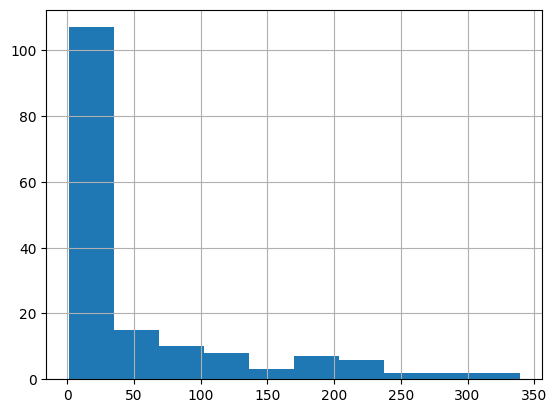

In [81]:
alcohol.hist()

In [84]:
iqr = alcohol.quantile(.75) - alcohol.quantile(.25)
iqr

58.25

In [86]:
print(alcohol.min())
print(alcohol.max())

1.0
339.0


In [89]:
print(alcohol.std())
print(alcohol.var())

print(alcohol.var()**0.5) # std deviation is square root of the variance

76.13491716376171
5796.5256115328575
76.13491716376171


In [91]:
alcohol.describe()

count    162.000000
mean      50.746914
std       76.134917
min        1.000000
25%        3.000000
50%       11.500000
75%       61.250000
max      339.000000
Name: wine_servings, dtype: float64

In [92]:
alcohol.describe(percentiles=[.79, .19]) # You can include percentiles you want to see

count    162.000000
mean      50.746914
std       76.134917
min        1.000000
19%        2.000000
50%       11.500000
79%       81.570000
max      339.000000
Name: wine_servings, dtype: float64

In [95]:
alcohol.describe(percentiles=[.79, .19], include=float, exclude=object) # Can include and exclude datatypes, in the alcohol series this doesn't make a difference as the values are already only float

count    162.000000
mean      50.746914
std       76.134917
min        1.000000
19%        2.000000
50%       11.500000
79%       81.570000
max      339.000000
Name: wine_servings, dtype: float64

In [96]:
alcohol.mode()

0    1.0
Name: wine_servings, dtype: float64

In [97]:
alcohol == 1 # How frequently does wine servings 1 occur?

country
Afghanistan    False
Albania        False
Algeria        False
Andorra        False
Angola         False
               ...  
Venezuela      False
Vietnam         True
Yemen          False
Zambia         False
Zimbabwe       False
Name: wine_servings, Length: 193, dtype: bool

In [98]:
alcohol[alcohol == 1].sum()

28.0

In [104]:
alcohol.value_counts() # Counts the frequency of each unique value in the series

1.0      28
2.0      10
7.0       9
8.0       7
5.0       6
         ..
218.0     1
185.0     1
78.0      1
165.0     1
22.0      1
Name: wine_servings, Length: 71, dtype: int64

In [105]:
# Recreating the above cell 
alcohol.value_counts().iloc[0]

28

Function Definition: 
Returns a sorted series containing unique values and their counts

ser.value_counts(
    sort=True, 
    ascending=False, 
    dropna=True, 
    normalize=False) 
    
These are the parameters and their default values

* Note that value_counts() only takes the non-null values
* The resulting series is returned in desc order by default i.e. desc order of counts
* It is possible to get the normalised value counts, see example below

In [106]:
alcohol.value_counts(normalize=True)
# These are not absolute counts, rather relative frequencies or percentages

1.0      0.172840
2.0      0.061728
7.0      0.055556
8.0      0.043210
5.0      0.037037
           ...   
218.0    0.006173
185.0    0.006173
78.0     0.006173
165.0    0.006173
22.0     0.006173
Name: wine_servings, Length: 71, dtype: float64

#### idxmax() and idxmin()

In [9]:
# How do we find the country with the highest wine servings 

alcohol.loc[alcohol == alcohol.max()].index

Index(['Portugal'], dtype='object', name='country')

In [10]:
alcohol.loc[alcohol == alcohol.max()].index[0] # This is quite messy

'Portugal'

In [12]:
alcohol.idxmax() # Returns the index of the element with the max value, if there are multiple only the first is returned

'Portugal'

In [13]:
alcohol.idxmin() # Returns the index of the element with the min value, if there are multiple only the first is returned

'Brunei'

In [14]:
alcohol.value_counts() 
# But you can see that there are multiple countries with min wine servings i.e. 22 of them. Brunei as returned by idxmin() is the alphabetically first one

1.0      28
2.0      10
7.0       9
8.0       7
5.0       6
         ..
218.0     1
185.0     1
78.0      1
165.0     1
22.0      1
Name: wine_servings, Length: 71, dtype: int64

In [16]:
alcohol.loc[alcohol.idxmax()] # We can use this function to index the alcohol series

339.0

#### Sorting

In [18]:
alcohol.sort_values() # Sorts the values in the series, this creates a new sorted series. Sorts in ASC order by default 
alcohol.sort_values(ascending = False) # DESC order 
alcohol.sort_values(na_position='first') # You can move the NaNs to the front if you want. They're in the end by default
alcohol.sort_values(kind = 'quicksort')  # This is by deafult, you also can use mergesort and heapsort
alcohol.sort_values(inplace = True) # This is to assign it back to the original series

In [21]:
# Lets say I wanted the 10 largest wine serving values
alcohol.sort_values(ascending=False)[:10]

country
Portugal             339.0
Andorra              312.0
Denmark              278.0
Slovenia             276.0
Luxembourg           271.0
Croatia              254.0
Italy                237.0
Equatorial Guinea    233.0
Argentina            221.0
Greece               218.0
Name: wine_servings, dtype: float64

In [22]:
alcohol.nlargest(n=10)

country
Portugal             339.0
Andorra              312.0
Denmark              278.0
Slovenia             276.0
Luxembourg           271.0
Croatia              254.0
Italy                237.0
Equatorial Guinea    233.0
Argentina            221.0
Greece               218.0
Name: wine_servings, dtype: float64

In [23]:
alcohol.nsmallest(n=10)

country
Thailand                    1.0
Solomon Islands             1.0
Brunei                      1.0
Haiti                       1.0
Cambodia                    1.0
Guyana                      1.0
Canada                      1.0
Jordan                      1.0
Central African Republic    1.0
Comoros                     1.0
Name: wine_servings, dtype: float64

In [24]:
# You can sort also by index values

alcohol.sort_index() # The same parameters that we spoke about earlier apply to this as well

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen            NaN
Zambia           4.0
Zimbabwe         4.0
Name: wine_servings, Length: 193, dtype: float64

#### Arithmetic Functions

In [33]:
alcohol.nlargest(n=5)

more_drinks = pd.Series({'Portugal':400})

alcohol.nlargest(n=5) + more_drinks # So Portugal got added to, but the others are all NaN now in this arithmetic sum 

Andorra         NaN
Denmark         NaN
Luxembourg      NaN
Portugal      739.0
Slovenia        NaN
dtype: float64

In [35]:
# If we want to keep the rest of the info as well 

alcohol.add(more_drinks, fill_value=0) # Ensures the values in alcohol show as well

Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen            NaN
Zambia           4.0
Zimbabwe         4.0
Length: 193, dtype: float64

In [ ]:
alcohol.subtract(more_drinks, fill_value=0) # You can also subtract values
alcohol.multiply(more_drinks, fill_value=1) # Multiply values
alcohol.divide(more_drinks, fill_value=1) # Divide values

While using these airthmetic functions, we don't need to worry about the order that the original series or the new series are in. 
Pandas automatically takes care of that

Lets try and calculate the variance with these arithmetic functions in a super roundabout way: 

s^2 = sum(x-xbar)^2/ n-1

* s^2 - variance or square of std dev
* xbar - mean
* n-1 - degrees of freedom


In [40]:
(alcohol.subtract(alcohol.mean())**2).sum()/(alcohol.count()-1)

# Note that we used count() here because we only want the non-null values for our calculation

5796.5256115328575

#### Cumulative Operations

Operations to get cumulative outputs in the series

In [41]:
alcohol.sum()

8221.0

In [46]:
alcohol = alcohol.sort_index() # Sorting this by index i.e. countries
#sort_values().cumsum() # Each value is the cumulative sum of the previous values

In [57]:
alcohol.cumsum() # By default this disregards the null values, which is useful because that would lead to the cumsum being NaN (see below)
# The skipna parameter is default = True

country
Afghanistan       NaN
Albania          54.0
Algeria          68.0
Andorra         380.0
Angola          425.0
                ...  
Venezuela      8212.0
Vietnam        8213.0
Yemen             NaN
Zambia         8217.0
Zimbabwe       8221.0
Name: wine_servings, Length: 193, dtype: float64

In [51]:
np.NaN + 2

nan

In [53]:
alcohol.prod()

3.4276115052182805e+183

In [52]:
alcohol.cumprod()

country
Afghanistan              NaN
Albania         5.400000e+01
Algeria         7.560000e+02
Andorra         2.358720e+05
Angola          1.061424e+07
                   ...      
Venezuela      2.142257e+182
Vietnam        2.142257e+182
Yemen                    NaN
Zambia         8.569029e+182
Zimbabwe       3.427612e+183
Name: wine_servings, Length: 193, dtype: float64

In [54]:
alcohol.cummin()

country
Afghanistan     NaN
Albania        54.0
Algeria        14.0
Andorra        14.0
Angola         14.0
               ... 
Venezuela       1.0
Vietnam         1.0
Yemen           NaN
Zambia          1.0
Zimbabwe        1.0
Name: wine_servings, Length: 193, dtype: float64

In [55]:
alcohol.cummax()

country
Afghanistan      NaN
Albania         54.0
Algeria         54.0
Andorra        312.0
Angola         312.0
               ...  
Venezuela      339.0
Vietnam        339.0
Yemen            NaN
Zambia         339.0
Zimbabwe       339.0
Name: wine_servings, Length: 193, dtype: float64

In [58]:
alcohol.head()

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
Name: wine_servings, dtype: float64

In [59]:
alcohol.diff().head() # Pairwise diff with the previous element

country
Afghanistan      NaN
Albania          NaN
Algeria        -40.0
Andorra        298.0
Angola        -267.0
Name: wine_servings, dtype: float64

In [ ]:
alcohol.diff(periods=-1) # Flipping the above 

In [60]:
alcohol.diff(periods=2).head() # Pairwise diff with 2 elements back

country
Afghanistan      NaN
Albania          NaN
Algeria          NaN
Andorra        258.0
Angola          31.0
Name: wine_servings, dtype: float64

#### Iteration

In [61]:
alcohol_mini = alcohol[:10]

for i in alcohol_mini:
    print(i)

nan
54.0
14.0
312.0
45.0
45.0
221.0
11.0
212.0
191.0


In [62]:
for i in alcohol_mini.index:
    print(i)

Afghanistan
Albania
Algeria
Andorra
Angola
Antigua & Barbuda
Argentina
Armenia
Australia
Austria


In [63]:
for i in alcohol_mini.items():   # Returns a tuple of index:value - this is highly performant because it is lazy evaluated
    print(i)

('Afghanistan', nan)
('Albania', 54.0)
('Algeria', 14.0)
('Andorra', 312.0)
('Angola', 45.0)
('Antigua & Barbuda', 45.0)
('Argentina', 221.0)
('Armenia', 11.0)
('Australia', 212.0)
('Austria', 191.0)


In [66]:
for i in alcohol_mini.iteritems(): # This is an alias that is going to be deprciated
    print(i)

('Afghanistan', nan)
('Albania', 54.0)
('Algeria', 14.0)
('Andorra', 312.0)
('Angola', 45.0)
('Antigua & Barbuda', 45.0)
('Argentina', 221.0)
('Armenia', 11.0)
('Australia', 212.0)
('Austria', 191.0)


C:\Users\TA972PB\AppData\Local\Temp\ipykernel_66468\173888281.py:1: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i in alcohol_mini.iteritems(): # This is an alias that is going to be deprciated


#### Filtering

In [68]:
alcohol.filter(regex = '^V')  # Filter applies to the index by default

country
Vanuatu      11.0
Venezuela     3.0
Vietnam       1.0
Name: wine_servings, dtype: float64

In [69]:
alcohol.filter(like = 'stan') # Also applies to index by default

country
Afghanistan      NaN
Kazakhstan      12.0
Kyrgyzstan       6.0
Pakistan         NaN
Tajikistan       NaN
Turkmenistan    32.0
Uzbekistan       8.0
Name: wine_servings, dtype: float64

In [71]:
# What if we wanted to filter by the values
# We already know this

alcohol.loc[alcohol > 200]


country
Andorra              312.0
Argentina            221.0
Australia            212.0
Belgium              212.0
Croatia              254.0
Denmark              278.0
Equatorial Guinea    233.0
Greece               218.0
Italy                237.0
Luxembourg           271.0
Portugal             339.0
Slovenia             276.0
Name: wine_servings, dtype: float64

In [73]:
# Or with a callable

def gt200(x): 
    return x > 200

In [74]:
alcohol[gt200]

country
Andorra              312.0
Argentina            221.0
Australia            212.0
Belgium              212.0
Croatia              254.0
Denmark              278.0
Equatorial Guinea    233.0
Greece               218.0
Italy                237.0
Luxembourg           271.0
Portugal             339.0
Slovenia             276.0
Name: wine_servings, dtype: float64

In [76]:
alcohol.where(lambda x: x > 200, other ='too small') # Replaces all the values in the condition with the 'other' value

country
Afghanistan    too small
Albania        too small
Algeria        too small
Andorra            312.0
Angola         too small
                 ...    
Venezuela      too small
Vietnam        too small
Yemen          too small
Zambia         too small
Zimbabwe       too small
Name: wine_servings, Length: 193, dtype: object

In [77]:
# The 'other' parameter in where() defaults to NaN
alcohol.where(lambda x: x>200)

country
Afghanistan      NaN
Albania          NaN
Algeria          NaN
Andorra        312.0
Angola           NaN
               ...  
Venezuela        NaN
Vietnam          NaN
Yemen            NaN
Zambia           NaN
Zimbabwe         NaN
Name: wine_servings, Length: 193, dtype: float64

In [78]:
alcohol.where(lambda x: x>200).dropna() # So chained with dropna() gives just the countries with value greater than 200
# Pand-adorable!

country
Andorra              312.0
Argentina            221.0
Australia            212.0
Belgium              212.0
Croatia              254.0
Denmark              278.0
Equatorial Guinea    233.0
Greece               218.0
Italy                237.0
Luxembourg           271.0
Portugal             339.0
Slovenia             276.0
Name: wine_servings, dtype: float64

In [80]:
# Lets say we want the opposite of the above i.e. x<=200 (but there are going to be situations where its not as simple as flipping the logical operator)
alcohol.mask(lambda x: x>200)

country
Afghanistan     NaN
Albania        54.0
Algeria        14.0
Andorra         NaN
Angola         45.0
               ... 
Venezuela       3.0
Vietnam         1.0
Yemen           NaN
Zambia          4.0
Zimbabwe        4.0
Name: wine_servings, Length: 193, dtype: float64

In [82]:
alcohol.mask(lambda x:x>200).dropna() # Once again we can chain it with dropna()

country
Albania              54.0
Algeria              14.0
Angola               45.0
Antigua & Barbuda    45.0
Armenia              11.0
                     ... 
Vanuatu              11.0
Venezuela             3.0
Vietnam               1.0
Zambia                4.0
Zimbabwe              4.0
Name: wine_servings, Length: 150, dtype: float64

#### Transformations

There are 2 categories: 

* Targeting a couple of specific records - spot 
* Targeting the entire series - global

In [83]:
# You can update values in a series 
alcohol.loc['Albania'] = 200

In [85]:
# But what if you want to update a series of values, use the update() method
alcohol.update(pd.Series([200,20], index = ['Albania', 'Algeria'])) # This is automatically inplace = True

In [86]:
alcohol.apply(lambda x: x**2) # This applies to the whole series

country
Afghanistan        NaN
Albania        40000.0
Algeria          400.0
Andorra        97344.0
Angola          2025.0
                ...   
Venezuela          9.0
Vietnam            1.0
Yemen              NaN
Zambia            16.0
Zimbabwe          16.0
Name: wine_servings, Length: 193, dtype: float64

In [87]:
# Couple of other ways you could do this

alcohol.apply(np.square) # Using the square ufunc

country
Afghanistan        NaN
Albania        40000.0
Algeria          400.0
Andorra        97344.0
Angola          2025.0
                ...   
Venezuela          9.0
Vietnam            1.0
Yemen              NaN
Zambia            16.0
Zimbabwe          16.0
Name: wine_servings, Length: 193, dtype: float64

In [93]:
def multiply_by_self(x): # Writing your own func
    return x*x

alcohol.apply(multiply_by_self)

country
Afghanistan        NaN
Albania        40000.0
Algeria          400.0
Andorra        97344.0
Angola          2025.0
                ...   
Venezuela          9.0
Vietnam            1.0
Yemen              NaN
Zambia            16.0
Zimbabwe          16.0
Name: wine_servings, Length: 193, dtype: float64

In [95]:
def multiply_by_self_with_min(x, min_servings): # You can make your function more complex as well
    if x < min_servings: 
        return x ** 2 
    else: 
        return x
    
alcohol.apply(multiply_by_self_with_min, args = (200,)) # Specifying the minimum here
alcohol.apply(multiply_by_self_with_min, min_servings = 200) # You can also do it like this

country
Afghanistan       NaN
Albania         200.0
Algeria         400.0
Andorra         312.0
Angola         2025.0
                ...  
Venezuela         9.0
Vietnam           1.0
Yemen             NaN
Zambia           16.0
Zimbabwe         16.0
Name: wine_servings, Length: 193, dtype: float64

map() and apply() are similar in some simple transformations, but with callables they are not. 
If your substitution is highly custom, use apply()

* ser.map({'old_value' : 'new_value'})
 
map() subs a series values with others from a function, series, or dict 
This takes more input types than apply()

But apply() is more flexible for custom defined transformations etc

## DataFrames

### Basics

In [4]:
players = pd.read_csv('soccer.csv')

In [5]:
players.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2,France,0,4,1,1,0


In [130]:
players.info() # Gives us the datatypes and not null counts for each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465 entries, 0 to 464
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          465 non-null    object 
 1   club          465 non-null    object 
 2   age           465 non-null    int64  
 3   position      464 non-null    object 
 4   position_cat  465 non-null    int64  
 5   market_value  462 non-null    float64
 6   page_views    465 non-null    int64  
 7   fpl_value     465 non-null    float64
 8   fpl_sel       465 non-null    object 
 9   fpl_points    465 non-null    int64  
 10  region        465 non-null    int64  
 11  nationality   465 non-null    object 
 12  new_foreign   465 non-null    int64  
 13  age_cat       465 non-null    int64  
 14  club_id       465 non-null    int64  
 15  big_club      465 non-null    int64  
 16  new_signing   465 non-null    int64  
dtypes: float64(2), int64(10), object(5)
memory usage: 61.9+ KB


In [133]:
type(players.dtypes) # This is a series too

pandas.core.series.Series

In [134]:
players.dtypes.value_counts() # Number of columns of diff datatypes

int64      10
object      5
float64     2
dtype: int64

In [135]:
players.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465 entries, 0 to 464
Columns: 17 entries, name to new_signing
dtypes: float64(2), int64(10), object(5)
memory usage: 61.9+ KB


In [137]:
players.info(verbose=False, memory_usage='deep') # Shorter summary that includes the memory size of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465 entries, 0 to 464
Columns: 17 entries, name to new_signing
dtypes: float64(2), int64(10), object(5)
memory usage: 190.7 KB


### Filtering

#### Functions for Boolean Masks

Boolean Indexing: 

1. Generate sequence of booleans
2. Use boolean sequence in [] or .loc[]

In [140]:
# Q: Players with market value greater than 40M? 

type(players.market_value) # So a single column in the pandas dataframe is surprise surprise, a series

pandas.core.series.Series

In [141]:
players.market_value > 40

0       True
1       True
2      False
3      False
4      False
       ...  
460    False
461    False
462    False
463    False
464    False
Name: market_value, Length: 465, dtype: bool

In [143]:
players[players.market_value > 40] # This is a dataframe slice

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2,Germany,0,4,1,1,0
96,Eden Hazard,Chelsea,26,LW,1,75.0,4220,10.5,2.30%,224,2,Belgium,0,3,5,1,0
97,Diego Costa,Chelsea,28,CF,1,50.0,4454,10.0,3.00%,196,2,Spain,0,4,5,1,0
108,N%27Golo Kante,Chelsea,26,DM,2,50.0,4042,5.0,13.80%,83,2,France,0,3,5,1,1
218,Philippe Coutinho,Liverpool,25,AM,1,45.0,2958,9.0,30.80%,171,3,Brazil,0,3,10,1,0
244,Kevin De Bruyne,Manchester+City,26,AM,1,65.0,2252,10.0,17.50%,199,2,Belgium,0,3,11,1,0
245,Sergio Aguero,Manchester+City,29,CF,1,65.0,4046,11.5,9.70%,175,3,Argentina,0,4,11,1,0
246,Raheem Sterling,Manchester+City,22,LW,1,45.0,2074,8.0,3.80%,149,1,England,0,2,11,1,0
264,Romelu Lukaku,Manchester+United,24,CF,1,50.0,3727,11.5,45.00%,221,2,Belgium,0,2,12,1,0


In [145]:
players[players.market_value > 40].shape # Use the shape attribute to check the size of the slice, 13 rows, 13 players

(13, 17)

In [146]:
players.position.unique()

array(['LW', 'AM', 'GK', 'RW', 'CB', 'RB', 'CF', 'LB', 'DM', 'RM', 'CM',
       nan, 'SS', 'LM'], dtype=object)

In [148]:
players.position.unique().size

14

In [149]:
# Apparently there are defender codes : LB, CB, RB
players.position.isin(['LB', 'CB', 'RB'])  # Returns a boolean mask 

0      False
1      False
2      False
3      False
4       True
       ...  
460    False
461     True
462     True
463    False
464    False
Name: position, Length: 465, dtype: bool

In [150]:
players.loc[players.position.isin(['LB', 'CB', 'RB'])] # Filtering the df with isin()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2,France,0,4,1,1,0
5,Hector Bellerin,Arsenal,22,RB,3,30.0,1675,6.0,13.70%,119,2,Spain,0,2,1,1,0
7,Nacho Monreal,Arsenal,31,LB,3,13.0,555,5.5,4.70%,115,2,Spain,0,4,1,1,0
8,Shkodran Mustafi,Arsenal,25,CB,3,30.0,1877,5.5,4.00%,90,2,Germany,0,3,1,1,1
17,Gabriel Paulista,Arsenal,26,CB,3,13.0,552,5.0,0.10%,45,3,Brazil,0,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,Aaron Cresswell,West+Ham,27,LB,3,12.0,380,5.0,1.30%,60,1,England,0,3,20,0,0
458,Angelo Ogbonna,West+Ham,29,CB,3,9.0,247,4.5,1.10%,45,2,Italy,0,4,20,0,0
459,Pablo Zabaleta,West+Ham,32,RB,3,7.0,698,5.0,2.70%,45,3,Argentina,0,5,20,0,0
461,Arthur Masuaku,West+Ham,23,LB,3,7.0,199,4.5,0.20%,34,4,Congo DR,0,2,20,0,1


In [155]:
players.loc[players.market_value.between(40, 50, inclusive='neither')] # Filtering df with between()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
218,Philippe Coutinho,Liverpool,25,AM,1,45.0,2958,9.0,30.80%,171,3,Brazil,0,3,10,1,0
246,Raheem Sterling,Manchester+City,22,LW,1,45.0,2074,8.0,3.80%,149,1,England,0,2,11,1,0
380,Dele Alli,Tottenham,21,CM,2,45.0,4626,9.5,38.60%,225,1,England,0,1,17,1,0


In [156]:
players.loc[players.market_value.between(40, 50, inclusive='both')] # Filtering df with between() and an inclusive range

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2,Germany,0,4,1,1,0
31,Alexandre Lacazette,Arsenal,26,CF,1,40.0,1183,10.5,26.50%,0,2,France,1,3,1,1,0
97,Diego Costa,Chelsea,28,CF,1,50.0,4454,10.0,3.00%,196,2,Spain,0,4,5,1,0
102,Thibaut Courtois,Chelsea,25,GK,4,40.0,1260,5.5,18.50%,141,2,Belgium,0,3,5,1,0
108,N%27Golo Kante,Chelsea,26,DM,2,50.0,4042,5.0,13.80%,83,2,France,0,3,5,1,1
218,Philippe Coutinho,Liverpool,25,AM,1,45.0,2958,9.0,30.80%,171,3,Brazil,0,3,10,1,0
219,Sadio Mane,Liverpool,25,LW,1,40.0,3219,9.5,5.30%,156,4,Senegal,0,3,10,1,1
246,Raheem Sterling,Manchester+City,22,LW,1,45.0,2074,8.0,3.80%,149,1,England,0,2,11,1,0
263,Bernardo Silva,Manchester+City,22,RW,1,40.0,1098,8.0,4.60%,0,2,Portugal,1,2,11,1,0
264,Romelu Lukaku,Manchester+United,24,CF,1,50.0,3727,11.5,45.00%,221,2,Belgium,0,2,12,1,0


In [158]:
players.loc[players.age < 50]

players.loc[players.age.le(50)]  # The le()function does the same as the above

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2,France,0,4,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,Edimilson Fernandes,West+Ham,21,CM,2,5.0,288,4.5,0.40%,38,2,Switzerland,0,1,20,0,1
461,Arthur Masuaku,West+Ham,23,LB,3,7.0,199,4.5,0.20%,34,4,Congo DR,0,2,20,0,1
462,Sam Byram,West+Ham,23,RB,3,4.5,198,4.5,0.30%,29,1,England,0,2,20,0,0
463,Ashley Fletcher,West+Ham,21,CF,1,1.0,412,4.5,5.90%,16,1,England,0,1,20,0,1


Similarly there are other comparison operators:

| Operation|Function | 
| :---: | :---:   |       
| <    | .lt()  | 
| <=   | .le()  | 
| \>   | .gt()  | 
| \>=  | .ge()  | 
| ==   | .eq()  | 

The only added functionality here is the fill_value parameter that can replace the NaN values with something else during the checking

#### Binary Operators

Otherwise known as bitwise operators

In [159]:
True | False # OR operator

True

In [ ]:
True & False # AND operator

In [160]:
f = pd.Series(False)
t = pd.Series(True)

In [161]:
t & f

0    False
dtype: bool

In [163]:
t = pd.Series([True if i%2 == 0 else False for i in range(10)])

t

0     True
1    False
2     True
3    False
4     True
5    False
6     True
7    False
8     True
9    False
dtype: bool

In [166]:
f = pd.Series([False for i in range(10)])
f

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
dtype: bool

In [167]:
t & f # Pandas is doing this element to element comparison based on the index

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
dtype: bool

In [168]:
# This is more obvious in this example 

f = pd.Series([False, True, False], index = ['c', 'b', 'a'])
t = pd.Series([True, False, False], index = ['a', 'b', 'c'])
f & t

a    False
b    False
c    False
dtype: bool

In [170]:
# Binary XOR 

print(True ^ False)   # There are different
print(True ^ True)    # They are the same
print(False ^ False)  # They are the same

True
False
False


In [174]:
# Two's Complement 

print(~False)  # ~ inverts the bits, so here its inverting the bits for 0 i.e. 00000000 (0) to 11111111 (-1)
print(~True)   # ~ inverts the bits, so here its inverting the bits for 1 i.e. 00000001 (1) to 11111110 (-2)


-1
-2


In [175]:
t = pd.Series([True, True, False])
~t
# Essentially reverses everything. Hmm.

0    False
1    False
2     True
dtype: bool

#### Multi-Condition Filtering

In [177]:
players.loc[players.position == 'LB']  # All LBs

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
7,Nacho Monreal,Arsenal,31,LB,3,13.00,555,5.5,4.70%,115,2,Spain,0,4,1,1,0
18,Kieran Gibbs,Arsenal,27,LB,3,10.00,489,5.0,0.50%,45,1,England,0,3,1,1,0
29,Sead Kolasinac,Arsenal,24,LB,3,15.00,618,6.0,6.90%,0,2,Bosnia,1,2,1,1,0
34,Charlie Daniels,Bournemouth,30,LB,3,3.00,185,5.0,19.80%,134,1,England,0,4,2,0,0
54,Brad Smith,Bournemouth,23,LB,3,2.00,297,4.0,3.30%,4,4,Australia,0,2,2,0,0
62,Gaetan Bong,Brighton+and+Hove,29,LB,3,1.50,97,4.5,0.20%,0,4,Cameroon,0,4,3,0,0
65,Markus Suttner,Brighton+and+Hove,30,LB,3,2.00,23,4.5,0.20%,0,2,Austria,0,4,3,0,0
82,Stephen Ward,Burnley,31,LB,3,1.50,152,4.5,2.50%,91,2,Ireland,0,4,4,0,0
99,Marcos Alonso Mendoza,Chelsea,26,LB,3,25.00,3069,7.0,12.40%,177,2,Spain,0,3,5,1,1
112,Kenedy,Chelsea,21,LB,3,7.00,566,5.0,0.10%,3,3,Brazil,0,1,5,1,0


In [179]:
players[(players.position == 'LB') & (players.age <=25)] # All LBs less than the age of 25
# Alwauys put the conditions within brackets

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
29,Sead Kolasinac,Arsenal,24,LB,3,15.00,618,6.0,6.90%,0,2,Bosnia,1,2,1,1,0
54,Brad Smith,Bournemouth,23,LB,3,2.00,297,4.0,3.30%,4,4,Australia,0,2,2,0,0
112,Kenedy,Chelsea,21,LB,3,7.00,566,5.0,0.10%,3,3,Brazil,0,1,5,1,0
128,Jeffrey Schlupp,Crystal+Palace,24,LB,3,8.00,385,5.0,0.30%,47,4,Ghana,0,2,6,0,0
212,Ben Chilwell,Leicester+City,20,LB,3,2.50,288,4.5,0.80%,19,1,England,0,1,9,0,0
236,Alberto Moreno,Liverpool,25,LB,3,10.00,397,4.5,0.30%,8,2,Spain,0,3,10,1,0
281,Luke Shaw,Manchester+United,22,LB,3,20.00,947,5.0,0.40%,45,1,England,0,2,12,1,0
294,Paul Dummett,Newcastle+United,25,LB,3,3.50,177,4.5,1.00%,0,2,Wales,0,3,13,0,0
298,Massadio Haidara,Newcastle+United,24,LB,3,1.50,114,4.0,0.50%,0,2,France,0,2,13,0,0
328,Matt Targett,Southampton,21,LB,3,3.00,110,4.5,0.20%,12,1,England,0,1,14,0,0


In [182]:
players[
    (players.position == 'LB') & 
    (players.age <=25) ^
    (players.market_value >= 10) & 
    ~(players.club.isin(['Tottenham', 'Arsenal']))
] 

# When you have multiple conditions, it is more readable to separate it out into lines

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
29,Sead Kolasinac,Arsenal,24,LB,3,15.0,618,6.0,6.90%,0,2,Bosnia,1,2,1,1,0
41,Benik Afobe,Bournemouth,24,CF,1,10.0,528,6.0,0.70%,88,4,Congo DR,0,2,2,0,0
44,Callum Wilson,Bournemouth,25,CF,1,10.0,337,6.0,0.20%,63,1,England,0,3,2,0,0
54,Brad Smith,Bournemouth,23,LB,3,2.0,297,4.0,3.30%,4,4,Australia,0,2,2,0,0
80,Andre Gray,Burnley,26,CF,1,10.0,687,6.5,1.70%,108,1,England,0,3,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,Andy Carroll,West+Ham,28,CF,1,10.0,1212,6.0,0.40%,69,1,England,0,4,20,0,0
455,Aaron Cresswell,West+Ham,27,LB,3,12.0,380,5.0,1.30%,60,1,England,0,3,20,0,0
457,Sofiane Feghouli,West+Ham,27,RW,1,12.0,394,5.5,0.20%,55,4,Algeria,0,3,20,0,1
461,Arthur Masuaku,West+Ham,23,LB,3,7.0,199,4.5,0.20%,34,4,Congo DR,0,2,20,0,1


In [183]:
# If you want your code to be even cleaner, use conditions as variables

arsenal_player = players.club == 'Arsenal'  # This is a boolean series
arsenal_player

0       True
1       True
2       True
3       True
4       True
       ...  
460    False
461    False
462    False
463    False
464    False
Name: club, Length: 465, dtype: bool

In [184]:
right_back = players.position == 'RB'
right_back

0      False
1      False
2      False
3      False
4      False
       ...  
460    False
461    False
462     True
463    False
464    False
Name: position, Length: 465, dtype: bool

In [186]:
chelsea_and_GK = (players.club == 'Chelsea') & (players.position == 'GK')
chelsea_and_GK

0      False
1      False
2      False
3      False
4      False
       ...  
460    False
461    False
462    False
463    False
464    False
Length: 465, dtype: bool

In [198]:
players.loc[arsenal_player & right_back | chelsea_and_GK] # How neat is that

# Note that one important fact is that all the individual boolean series of the conditions are the same size as the df, this is necessary

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
5,Hector Bellerin,Arsenal,22,RB,3,30.0,1675,6.0,13.70%,119,2,Spain,0,2,1,1,0
27,Carl Jenkinson,Arsenal,25,RB,3,5.0,561,4.5,0.40%,2,1,England,0,3,1,1,0
102,Thibaut Courtois,Chelsea,25,GK,4,40.0,1260,5.5,18.50%,141,2,Belgium,0,3,5,1,0
109,Willy Caballero,Chelsea,35,GK,4,1.5,542,5.0,0.20%,64,3,Argentina,0,6,5,1,0


### 2D Indexing

In [200]:
chelsea_under_23 = (players.club == 'Chelsea')  &  (players.age < 23)
chelsea_under_23.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [202]:
players.loc[chelsea_under_23]

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
111,Kurt Zouma,Chelsea,22,CB,3,15.0,723,5.5,0.80%,15,2,France,0,2,5,1,0
112,Kenedy,Chelsea,21,LB,3,7.0,566,5.0,0.10%,3,3,Brazil,0,1,5,1,0
115,Tiemoue Bakayoko,Chelsea,22,DM,2,16.0,1011,5.0,1.60%,0,2,France,1,2,5,1,0


In [204]:
# Now what if we wanted only some of the columns in the output of this filtering? 

players.loc[chelsea_under_23, ['position', 'market_value']]

,position,market_value
111,CB,15.0
112,LB,7.0
115,DM,16.0


In [205]:
# What if we wanted all the column that start with 'p'

players.columns

Index(['name', 'club', 'age', 'position', 'position_cat', 'market_value',
       'page_views', 'fpl_value', 'fpl_sel', 'fpl_points', 'region',
       'nationality', 'new_foreign', 'age_cat', 'club_id', 'big_club',
       'new_signing'],
      dtype='object')

In [207]:
players.columns.str.startswith('p')  # Notice that the length of this boolean mask matches the length of the horizontal or number of columns

array([False, False, False,  True,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False])

In [208]:
p_cols = players.columns.str.startswith('p') # So this is a boolean mask now
players.loc[chelsea_under_23, p_cols]
# Neat

,position,position_cat,page_views
111,CB,3,723
112,LB,3,566
115,DM,2,1011


In [211]:
# You could also what's called chaining for the same operation & the same output as .loc[,]

print(players[chelsea_under_23]['position'])
# is the same as 
print(players.loc[chelsea_under_23, 'position'])

111    CB
112    LB
115    DM
Name: position, dtype: object
111    CB
112    LB
115    DM
Name: position, dtype: object


But under the hood, chaining is always slower than using .loc[] because getitems get called twice for chaining. 
>  So avoid chaining, use .loc[]

IN SUMMARY: 

| Operator                                          |           What is                 | 
| :---:                                             | :---:                             |       
| players.loc[0:2]                                  | slicing                           | 
| players.loc[players.age > 37]                     | boolean masking                   | 
| players.loc[132, 'name']                          | basic (label-based) indexing      | 
| players.loc[[0, 132], ['name, 'market_value']]    | fancy indexing                    | 
| players[players.age < 30]['position']             | chaining (avoid this)             | 


In [215]:
players.loc[[0, 132], ['name', 'market_value']] # fancy

,name,market_value
0,Alexis Sanchez,65.0
132,Connor Wickham,6.0


In [217]:
# lookup() - this is an intersection of the labels i.e. its looking up column 'name' with index 0 and column 'market_value' with index 132

players.lookup([0, 132], ['name', 'market_value'])

C:\Users\TA972PB\AppData\Local\Temp\ipykernel_66468\848393239.py:3: FutureWarning: The 'lookup' method is deprecated and will be removed in a future version. You can use DataFrame.melt and DataFrame.loc as a substitute.
  players.lookup([0, 132], ['name', 'market_value'])


array(['Alexis Sanchez', 6.0], dtype=object)

In [226]:
# Lets say I want to lookup the following arrtibutes of the following players resp:

names = ['Petr Coch', 'Mesut Ozil', 'Alexis Sanchez']
attributes = ['age', 'market_value', 'page_views' ]

players.lookup(name, attributes)

# We can't really use this because the index of the df is not the names, its the predefined default index of the df as integers

NameError: name 'name' is not defined

In [221]:
players.index

RangeIndex(start=0, stop=465, step=1)

In [224]:
players.set_index('name')

,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
name,,,,,,,,,,,,,,,,
Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3,Chile,0,4,1,1,0
Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2,Germany,0,4,1,1,0
Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2,Czech Republic,0,6,1,1,0
Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1,England,0,4,1,1,0
Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2,France,0,4,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Edimilson Fernandes,West+Ham,21,CM,2,5.0,288,4.5,0.40%,38,2,Switzerland,0,1,20,0,1
Arthur Masuaku,West+Ham,23,LB,3,7.0,199,4.5,0.20%,34,4,Congo DR,0,2,20,0,1
Sam Byram,West+Ham,23,RB,3,4.5,198,4.5,0.30%,29,1,England,0,2,20,0,0


In [227]:
players.set_index('name').lookup(names, attributes)
# Ok I don't know what's wrong here

C:\Users\TA972PB\AppData\Local\Temp\ipykernel_66468\4137716727.py:1: FutureWarning: The 'lookup' method is deprecated and will be removed in a future version. You can use DataFrame.melt and DataFrame.loc as a substitute.
  players.set_index('name').lookup(names, attributes)


ValueError: DataFrame.lookup requires unique index and columns

### Sorting

In [6]:
players.sort_values(by='market_value', ascending=False)

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
96,Eden Hazard,Chelsea,26,LW,1,75.00,4220,10.5,2.30%,224,2,Belgium,0,3,5,1,0
267,Paul Pogba,Manchester+United,24,CM,2,75.00,7435,8.0,19.50%,115,2,France,0,2,12,1,1
0,Alexis Sanchez,Arsenal,28,LW,1,65.00,4329,12.0,17.10%,264,3,Chile,0,4,1,1,0
244,Kevin De Bruyne,Manchester+City,26,AM,1,65.00,2252,10.0,17.50%,199,2,Belgium,0,3,11,1,0
245,Sergio Aguero,Manchester+City,29,CF,1,65.00,4046,11.5,9.70%,175,3,Argentina,0,4,11,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,Joel Castro Pereira,Manchester+United,21,GK,4,0.10,395,4.0,1.00%,6,2,Portugal,0,1,12,1,0
113,Eduardo Carvalho,Chelsea,34,LW,1,0.05,467,5.0,0.10%,0,2,Portugal,0,6,5,1,1
30,Granit Xhaka,Arsenal,24,NaN,2,NaN,1815,5.5,2.00%,85,2,Switzerland,0,2,1,1,0
192,Steve Mounie,Huddersfield,22,CF,1,NaN,56,6.0,0.60%,0,2,Benin,0,2,8,0,0


In [7]:
players.index

RangeIndex(start=0, stop=465, step=1)

In [8]:
players.set_index('name', inplace = True)

In [9]:
players.index

Index(['Alexis Sanchez', 'Mesut Ozil', 'Petr Cech', 'Theo Walcott',
       'Laurent Koscielny', 'Hector Bellerin', 'Olivier Giroud',
       'Nacho Monreal', 'Shkodran Mustafi', 'Alex Iwobi',
       ...
       'Aaron Cresswell', 'Pedro Obiang', 'Sofiane Feghouli', 'Angelo Ogbonna',
       'Pablo Zabaleta', 'Edimilson Fernandes', 'Arthur Masuaku', 'Sam Byram',
       'Ashley Fletcher', 'Diafra Sakho'],
      dtype='object', name='name', length=465)

In [14]:
players.sort_index(inplace = True)

### Exercises 

#### Exercise 1

In [68]:
# Exercise 1

actor_names = ['A', 'B', 'C']
actor_ages = [20,30,40]

actor_series = pd.Series(actor_ages, index = actor_names, name = 'actors')
actor_series

A    20
B    30
C    40
Name: actors, dtype: int64

In [69]:
# If you were to do the above with a ditionary instead 
zip(actor_names, actor_ages)  # zip() gives an iterable tuples 
list(zip(actor_names, actor_ages)) # List of tuples 
actors_dict = dict(zip(actor_names, actor_ages)) # Dictionary generated from lists 
actors_dict

# You can also use dictionary comprehension for the same 
actors_dict = {name:age for name, age in zip(actor_names, actor_ages)}
actors_dict

actor_series = pd.Series(actors_dict, name = 'actors') # Series created from a dictionary
actor_series

A    20
B    30
C    40
Name: actors, dtype: int64

#### Exercise 2

In [70]:
# Exercise 2 

squares = pd.Series([x**2 for x in range(0,100)])
a = squares[-3:]
b = squares.tail()
a.equals(b)

False

#### Exercise 3

In [71]:
# Exercise 3 

wine_servings = alcohol.loc[alcohol.notnull()]
wine_servings.sum() 

# Total wine consumed by countries that consumed less than 100 servings 
wine_servings < 100  # This returns a boolean mask 

wine_servings.loc[wine_servings < 100].sum()

2416.0

#### Exercise 4

In [27]:
# Exercise 4 

fifty_plus = alcohol[alcohol > 50]
fiftyplus_smallest10 = fifty_plus.nsmallest(n=20)

fiftyplus_smallest10.describe()


count     20.000000
mean      74.250000
std       19.072921
min       51.000000
25%       58.250000
50%       73.500000
75%       84.500000
max      113.000000
Name: wine_servings, dtype: float64

#### Exercise 5

In [97]:
# Exercice 5 

beers = pd.read_csv('drinks.csv', usecols = ['country', 'beer_servings'], index_col = 'country').squeeze() # Putting the beer servings into a new series

In [99]:
beers.describe()

count    178.000000
mean     102.870787
std      100.645713
min        1.000000
25%       21.000000
50%       60.000000
75%      172.500000
max      376.000000
Name: beer_servings, dtype: float64

<AxesSubplot: >

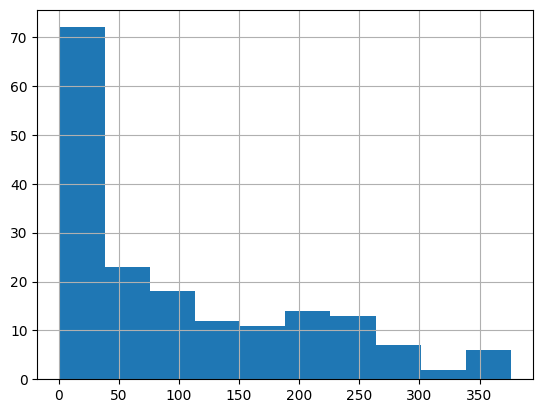

In [101]:
beers.hist() # The distribution is right skewed

In [105]:
beers.iloc[:10].subtract(beers.mean())  # Are the first 10 countries relatively large or small as compared to the rest of the sample?

country
Afghanistan                 NaN
Albania              -13.870787
Algeria              -77.870787
Andorra              142.129213
Angola               114.129213
Antigua & Barbuda    -90.870787
Argentina             90.129213
Armenia              -81.870787
Australia            158.129213
Austria              176.129213
Name: beer_servings, dtype: float64

In [112]:
# You can visualise this better with some custom labels 

(beers[:10] - beers.mean()).apply(lambda x : 'low' if x < 0 else 'high')

country
Afghanistan          high
Albania               low
Algeria               low
Andorra              high
Angola               high
Antigua & Barbuda     low
Argentina            high
Armenia               low
Australia            high
Austria              high
Name: beer_servings, dtype: object

Calculating z-scores or standard scores for the above example: 

z = xi - xbar/ sd



In [118]:
# Calculating the z-scores in a new series

z_scores = (beers - beers.mean()) / beers.std()


In [119]:
z_scores

country
Afghanistan         NaN
Albania       -0.137818
Algeria       -0.773712
Andorra        1.412174
Angola         1.133970
                 ...   
Venezuela      2.286528
Vietnam        0.080771
Yemen         -0.962493
Zambia        -0.704161
Zimbabwe      -0.386214
Name: beer_servings, Length: 193, dtype: float64

In [120]:
z_scores.abs() # Absolute values

country
Afghanistan         NaN
Albania        0.137818
Algeria        0.773712
Andorra        1.412174
Angola         1.133970
                 ...   
Venezuela      2.286528
Vietnam        0.080771
Yemen          0.962493
Zambia         0.704161
Zimbabwe       0.386214
Name: beer_servings, Length: 193, dtype: float64

In [123]:
z_scores.abs().max()

2.713768984410912

In [124]:
# What's the country with the max z score? 

z_scores.abs().idxmax()

'Namibia'

In [125]:
# The largest absolute z-score is 0.026963 
# Is this a positive or negative deviation? 

# Positive deviation.

#### Exercise 6

In [189]:
players.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2,France,0,4,1,1,0


In [196]:
english = players.nationality == 'England'
above_average = players.market_value > (players.market_value.mean() * 2) 
popular_xor_new = (players.page_views > 4000) ^ (players.new_signing == 1)

In [197]:
players[english & above_average & popular_xor_new]

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
256,John Stones,Manchester+City,23,CB,3,35.0,1078,5.5,2.30%,59,1,England,0,2,11,1,1
380,Dele Alli,Tottenham,21,CM,2,45.0,4626,9.5,38.60%,225,1,England,0,1,17,1,0
381,Harry Kane,Tottenham,23,CF,1,60.0,4161,12.5,35.10%,224,1,England,0,2,17,1,0


#### Exercise 7